### Predictive Analytics : Explore correlations between customer attributes, build a regression and a decision-tree prediction model based on your findings.

<font color=green> <b>Used Pandas to evaluate mean customer annual salary and then grouped customer data by customer id and mean. Used Scikit-learn for machine learning algorithms in Python. Linear regression model - used card present flag, merchant code, balance, age and amount from grouped data set to predict annual salary.

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [5]:
sns.set_style('whitegrid')

In [7]:
# Importing the Data Set
anz = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [8]:
anz.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [9]:
# Subsetting the the Data into  new DataFrame containing only Pay/Salary Transaction.

cust_id_sal = anz[anz['txn_description'] == 'PAY/SALARY'].groupby('customer_id')['amount'].sum().reset_index()
cust_id_sal.head(5)

,customer_id,amount
0,CUS-1005756958,12616.11
1,CUS-1117979751,25050.55
2,CUS-1140341822,11499.06
3,CUS-1147642491,22248.07
4,CUS-1196156254,27326.11


In [10]:
# Calculating the Annual Salary for all the Customers

cust_id_sal['amount'] = np.round(cust_id_sal['amount']/90*365)
cust_id_sal.head(5)

,customer_id,amount
0,CUS-1005756958,51165.0
1,CUS-1117979751,101594.0
2,CUS-1140341822,46635.0
3,CUS-1147642491,90228.0
4,CUS-1196156254,110823.0


In [11]:
# Creating a New Column in main Data Set and Inputing the Annual Salary for Each Customer ID.

sal = []
for cid in anz['customer_id']:
    sal.append(int(cust_id_sal[cust_id_sal['customer_id']==cid]['amount']))

anz["Annual_Salary"] = sal


In [12]:
anz.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,Annual_Salary
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,57554
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,57554
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,52835
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,47033
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,57554


<font color=blue> <b> Creating Missing Value Function

In [13]:
def missing_values_table(anz):
        mis_val = anz.isnull().sum()
        mis_val_percent = 100 * anz.isnull().sum() / len(anz)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(anz.shape[1]))   
        print("There are " + str(mis_val_table_ren_columns.shape[0])+" columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(anz).style.background_gradient(cmap='vlag_r')


Your selected dataframe has 24
There are 7 columns that have missing values.


,Missing Values,% of Total Values
merchant_code,11160,92.700000
bpay_biller_code,11158,92.700000
card_present_flag,4326,35.900000
merchant_id,4326,35.900000
merchant_suburb,4326,35.900000
merchant_state,4326,35.900000
merchant_long_lat,4326,35.900000


<font color=blue> <b> Deleting the Missing Value Attritbutes and other Categorical Attributes.

In [14]:
anz.drop(['status', 'bpay_biller_code', 'account','currency', 'long_lat', 'merchant_id','merchant_code', 'first_name', 'date',
       'merchant_suburb', 'merchant_state', 'extraction', 'transaction_id', 'country', 'merchant_long_lat', 'movement'],axis=1, inplace=True)

In [15]:
anz.head(5)

,card_present_flag,txn_description,balance,gender,age,amount,customer_id,Annual_Salary
0,1.0,POS,35.39,F,26,16.25,CUS-2487424745,57554
1,0.0,SALES-POS,21.20,F,26,14.19,CUS-2487424745,57554
2,1.0,POS,5.71,M,38,6.42,CUS-2142601169,52835
3,1.0,SALES-POS,2117.22,F,40,40.90,CUS-1614226872,47033
4,1.0,SALES-POS,17.95,F,26,3.25,CUS-2487424745,57554


In [16]:
anz.shape

(12043, 8)

<font color=blue> <b> Checking the Correlation between the attribute and Annual Salary

In [17]:
anz.corr()

,card_present_flag,balance,age,amount,Annual_Salary
card_present_flag,1.000000,0.005925,-0.008405,-0.002074,-0.018868
balance,0.005925,1.000000,0.199329,0.059178,0.253090
age,-0.008405,0.199329,1.000000,0.029980,0.026424
amount,-0.002074,0.059178,0.029980,1.000000,0.091213
Annual_Salary,-0.018868,0.253090,0.026424,0.091213,1.000000


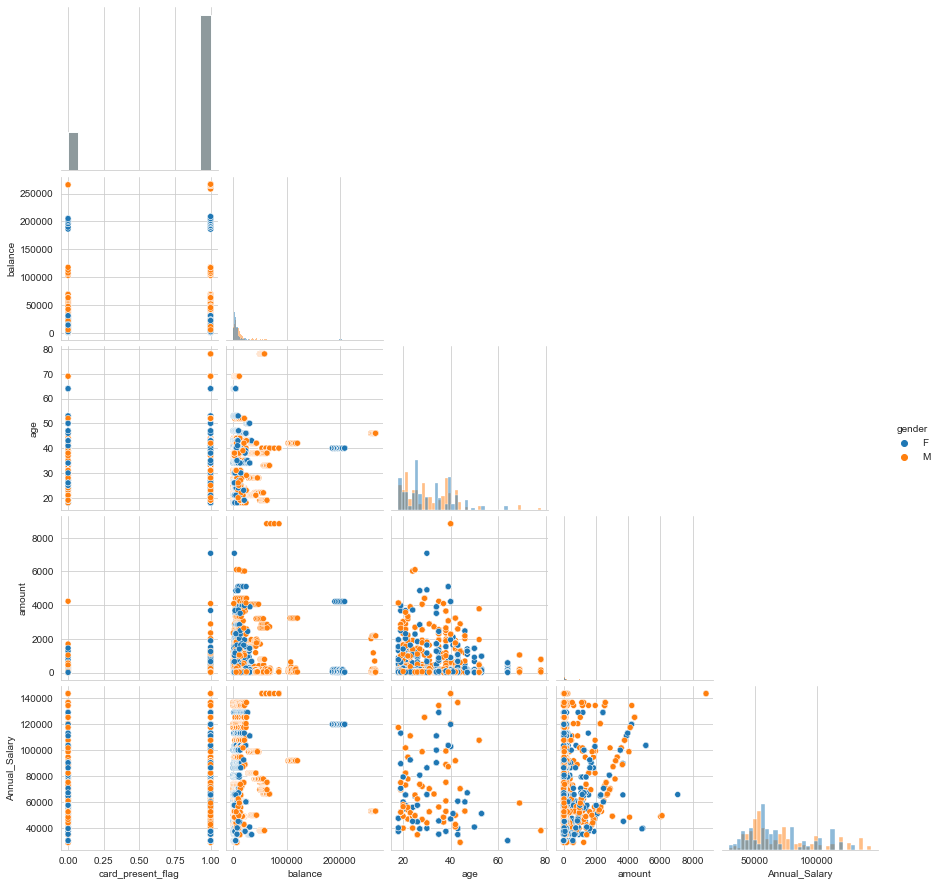

In [18]:
# Visualizing the pair plot between the Attributes

sns.pairplot(data = anz, hue='gender', diag_kind='hist', corner=True)

In [19]:
# Dropping the attributes 

anz.drop(['card_present_flag','txn_description','customer_id'], axis=1, inplace=True)


In [20]:
anz.head(5)

,balance,gender,age,amount,Annual_Salary
0,35.39,F,26,16.25,57554
1,21.20,F,26,14.19,57554
2,5.71,M,38,6.42,52835
3,2117.22,F,40,40.90,47033
4,17.95,F,26,3.25,57554


<font color=blue> <b> Converting the gender column from categorical to numerical

In [21]:
Gender = pd.get_dummies(anz['gender'],drop_first=True)
#Gender
anz_sal = pd.concat([anz,Gender], axis=1)
anz_sal.drop('gender',axis=1,inplace=True)
anz_sal

,balance,age,amount,Annual_Salary,M
0,35.39,26,16.25,57554,0
1,21.20,26,14.19,57554,0
2,5.71,38,6.42,52835,1
3,2117.22,40,40.90,47033,0
4,17.95,26,3.25,57554,0
...,...,...,...,...,...
12038,14054.14,30,9.79,86292,0
12039,9137.79,20,63.87,56461,1
12040,45394.57,28,43.96,98666,1
12041,11350.67,69,30.77,59226,1


<font color=blue> <b> Visualizing the Heat Map between the Attributes

<AxesSubplot:>

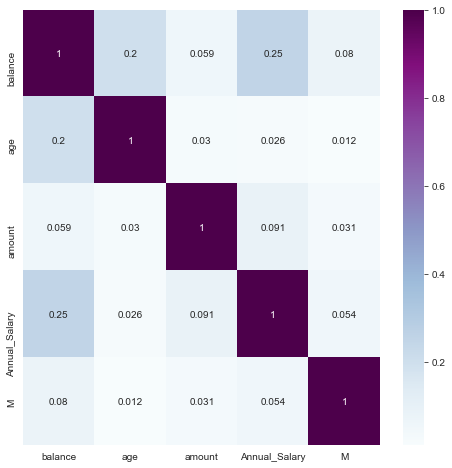

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(anz_sal.corr(), cmap='BuPu', annot=True)


Analysis:
- Balance is most likely to correalte with Annual Salary. (25%)
- amount is correalted by 9% with Annual Salary
- Age 2%
- Gender(Male/Female): 5%

In [23]:
# Mean Annual Salary By Age Group
anz_sal[['age','Annual_Salary']].groupby('age').mean()

,Annual_Salary
age,
18,66557.665158
19,78817.686869
20,60499.244444
21,72016.353342
22,70842.964912
23,84986.391586
24,49079.107923
25,60396.866019
26,54459.612542


<font color=blue> <b> Visualizing the Realtion Between and Age and Annual Salary

<AxesSubplot:xlabel='age', ylabel='Annual_Salary'>

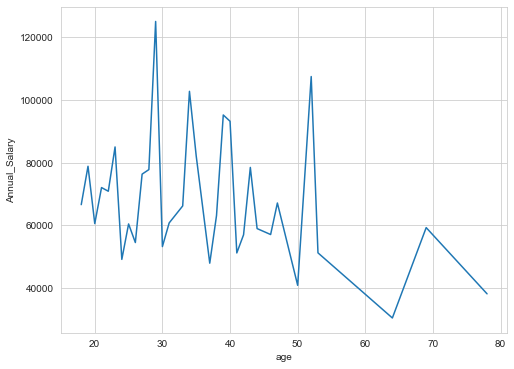

In [24]:
plt.figure(figsize=(8,6))
sns.lineplot(data=anz_sal[['age','Annual_Salary']].groupby('age').mean(), x='age',y='Annual_Salary')


Analysis:
- Age Group 27-35 has the maximum avarage Annual Salary.
- Highest Mean Annual Salary is at age 29 Followed By Age 52.
- There is Steep Fall in Salary post age of 52.

In [25]:
np.round(anz_sal[anz_sal['M']==1]['Annual_Salary'].mean(),2)

71021.2

<font color=blue> <b> Visualizing Gender vs Annual Salary

Mean Annual Salary for Male is: 71021.2 AUD
Mean Annual Salary for Feamle is: 68166.06 AUD


<AxesSubplot:xlabel='M', ylabel='Annual_Salary'>

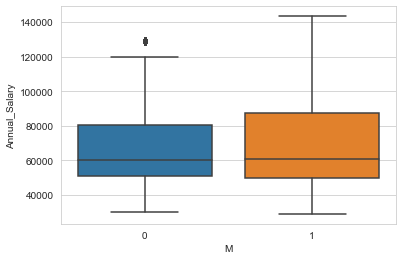

In [26]:
print(f"Mean Annual Salary for Male is: {np.round(anz_sal[anz_sal['M']==1]['Annual_Salary'].mean(),2)} AUD")
print(f"Mean Annual Salary for Feamle is: {np.round(anz_sal[anz_sal['M']==0]['Annual_Salary'].mean(),2)} AUD")

# Visualiziton
sns.boxplot(data=anz_sal, x='M',y='Annual_Salary')

Analysis:
- Mean annual Salay for Male is likely to be more than Female by 3000 AUD.
- Maximum Annual Salary for Female is likeluy to be arroun AUD 120K and for Male is AUD 140K.


In [29]:
anz_sal.to_excel('Anz_SAl.xlsx', engine='xlsxwriter')

<font color=red> <b> Predictive Analysis

- <font color=blue> <b> Linear Regression

In [32]:
anz_sal.head()

,balance,age,amount,Annual_Salary,M
0,35.39,26,16.25,57554,0
1,21.20,26,14.19,57554,0
2,5.71,38,6.42,52835,1
3,2117.22,40,40.90,47033,0
4,17.95,26,3.25,57554,0


In [33]:
anz.shape

(12043, 5)

In [34]:
# Splitting the data into Target and Predictors

X = anz_sal.drop('Annual_Salary',axis=1)    # Predictors
Y = anz_sal['Annual_Salary']                # Target

In [35]:
# Splitting a Data Into Train and Test.

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [36]:
# Creating a instance of Linear Regression
ln = LinearRegression()

In [37]:
 # Fitting a Train Data into the Model

ln.fit(X_train,y_train)

LinearRegression()

In [38]:
# Predicting the Annual Salary of the Test Data

Sal_predict = ln.predict(X_test)

In [39]:
len(Sal_predict)

3613

In [40]:
# Coefficent of the Linear Regression Equation

ln.coef_
cdf = pd.DataFrame(ln.coef_,X.columns, columns=['Coeffecient'])
cdf

,Coeffecient
balance,0.200494
age,-56.591268
amount,3.370537
M,1493.879045


In [41]:
# Calculation of Errors 

print('MAE:', metrics.mean_absolute_error(y_test, Sal_predict))
print('MSE:', metrics.mean_squared_error(y_test, Sal_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Sal_predict)))

MAE: 20143.240335613067
MSE: 641451868.3719049
RMSE: 25326.900094008837


In [42]:
# Accuracy of the Model or R^2 Value

print("Model accuracy on Test Data", ln.score(X_test , y_test))

Model accuracy on Test Data 0.07429266991931915


<AxesSubplot:xlabel='Annual_Salary'>

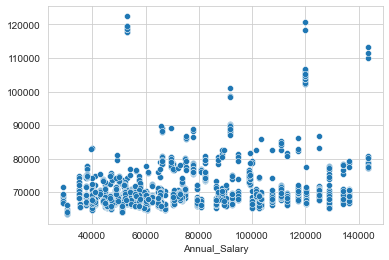

In [43]:
sns.scatterplot(x = y_test, y = Sal_predict)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

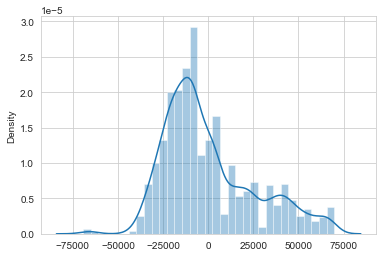

In [44]:
# Visualizing the Residual

sns.distplot(x = (y_test-Sal_predict))

- <font color=blue> <b> Decision Tree Regressor

In [45]:
# Creating a Instance of Model

Dtr = DecisionTreeRegressor()

In [46]:
# Fitting the Model to Train Data

Dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [47]:
Sal_predict_Dtr = Dtr.predict(X_test)

In [48]:
len(Sal_predict_Dtr)

3613

In [49]:
# Calculation of Errors 

print('MAE:', metrics.mean_absolute_error(y_test, Sal_predict_Dtr))
print('MSE:', metrics.mean_squared_error(y_test, Sal_predict_Dtr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Sal_predict_Dtr)))

MAE: 3418.9579296983115
MSE: 137721992.83061168
RMSE: 11735.501388121927


In [50]:
# Accuracy of the Model or R^2 Value

print("Model accuracy on Test Data", Dtr.score(X_test , y_test))

Model accuracy on Test Data 0.8012473506387869


In [51]:
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
# R^2 Score of DT regression
r2_score(y_test, Sal_predict_Dtr)

0.8012473506387869

In [56]:
# R^2 Score of Linear Regression
r2_score(y_test, Sal_predict)

0.07429266991931915

<b> Conclusion: 
- After comparing and analysing all the variables available, we concluded that Balance, gender, age and amount are the variable likely to imapact the annual salary prediction.
-  We have predicted yearly salary of the Customers using 2 models: Linear Regression with Accusracy of 0.074 and Decision Tree regression with accuracy of 0.8012.
- As per the accuracy we have received, Decision Tree Regressor is the best model to Predict the Annual Salary